Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv
Accuracy: 0.9248
Precision: 0.9330
Recall: 0.9087


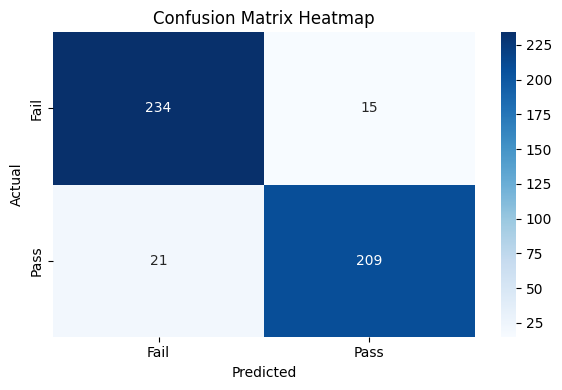

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from google.colab import files
uploaded = files.upload()
# Load the CSV file
df = pd.read_csv("8. Student Performance Prediction.csv")

# Step 1: Create a binary target column - Pass (1) if GPA >= 2.0, else Fail (0)
df['Pass'] = (df['GPA'] >= 2.0).astype(int)

# Step 2: Select relevant features
features = [
    'Absences', 'StudyTimeWeekly', 'Tutoring',
    'ParentalSupport', 'Extracurricular', 'Sports',
    'Music', 'Volunteering', 'ParentalEducation', 'Age'
]
X = df[features]
y = df['Pass']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Step 6: Plot heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()
